In [85]:
pip install tensorflow==2.11.0


Note: you may need to restart the kernel to use updated packages.


In [86]:
from keras.preprocessing.text import one_hot
import pandas as pd
import tweepy
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Getting preprocessed data for CNN from CSV file

In [87]:
np.random.seed(500)
preprocessedData_CNN = pd.read_csv('preprocessed_nov_23_df_cnn_topic_combined.csv',delimiter=',',encoding='latin-1')
preprocessedData_CNN.head()


,Unnamed: 0.2,Unnamed: 0.1,screenName,description,location,text,Unnamed: 0,topic,topicEncoded,tokenized_sentences,clean_text
0,0,0,CNN,Itâs our job to #GoThere & tell the most dif...,NaN,another employee exodus appears underway twitt...,31.0,corporatenews,0,"['anoth', 'employe', 'exodu', 'appear', 'under...",anoth employe exodu appear underway twitter ma...
1,1,1,CNN,Itâs our job to #GoThere & tell the most dif...,NaN,amazon ceo andy jassy said job cuts the e-comm...,36.0,corporatenews,0,"['amazon', 'ceo', 'andi', 'jassi', 'said', 'jo...",amazon ceo andi jassi said job cut e-commerc g...
2,2,2,CNN,Itâs our job to #GoThere & tell the most dif...,NaN,max verstappen and red bull have hit out onlin...,37.0,corporatenews,0,"['max', 'verstappen', 'red', 'bull', 'hit', 'o...",max verstappen red bull hit onlin threat abus ...
3,3,3,CNN,Itâs our job to #GoThere & tell the most dif...,NaN,here are things you need know today new york s...,45.0,corporatenews,0,"['thing', 'need', 'know', 'today', 'new', 'yor...",thing need know today new york snowstorm twitt...
4,4,4,CNN,Itâs our job to #GoThere & tell the most dif...,NaN,riptwitter was the top trend worldwide thursda...,53.0,corporatenews,0,"['riptwitt', 'top', 'trend', 'worldwid', 'thur...",riptwitt top trend worldwid thursday even user...


# Getting preprocessed data for FOX from CSV file

In [88]:
np.random.seed(500)
preprocessedData_Fox = pd.read_csv('preprocessed_nov_23_df_fox_topic_combined.csv',delimiter=',',encoding='latin-1')
preprocessedData_Fox.head()


,Unnamed: 0.2,Unnamed: 0.1,screenName,description,location,text,Unnamed: 0,topic,topicEncoded,tokenized_sentences,clean_text
0,0,0,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,elon musk triggers liberals with ultimatum twi...,10.0,corporatenews,0,"['elon', 'musk', 'trigger', 'liber', 'ultimatu...",elon musk trigger liber ultimatum twitter staf...
1,1,1,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,"musk trolls aoc, liberal journalists who panic...",20.0,corporatenews,0,"['musk', 'troll', 'aoc', ',', 'liber', 'journa...","musk troll aoc , liber journalist panick end t..."
2,2,2,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,twitter reportedly losing more staff members a...,52.0,corporatenews,0,"['twitter', 'reportedli', 'lose', 'staff', 'me...",twitter reportedli lose staff member musk hard...
3,3,3,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,sen markey warns elon musk will pay price new ...,63.0,corporatenews,0,"['sen', 'markey', 'warn', 'elon', 'musk', 'pay...",sen markey warn elon musk pay price new twitte...
4,4,4,FoxNews,"Follow America's #1 cable news network, delive...",U.S.A.,surge twitter fact-checks progressive figures ...,81.0,corporatenews,0,"['surg', 'twitter', 'fact-check', 'progress', ...",surg twitter fact-check progress figur draw pr...


# Getting preprocessed data for REUTERS from CSV file

In [89]:
np.random.seed(500)
preprocessedData_Reuters = pd.read_csv('preprocessed_nov_23_df_reuters_topic_combined.csv',delimiter=',',encoding='latin-1')
preprocessedData_Reuters.head()

,Unnamed: 0.2,Unnamed: 0.1,screenName,description,location,text,Unnamed: 0,topic,topicEncoded,tokenized_sentences,clean_text
0,0,0,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,italy court rejects googles appeal against wat...,0.0,corporatenews,0,"['itali', 'court', 'reject', 'googl', 'appeal'...",itali court reject googl appeal watchdog fine ...
1,1,1,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,jaguar land rover turns laid-off tech workers ...,4.0,corporatenews,0,"['jaguar', 'land', 'rover', 'turn', 'laid-off'...",jaguar land rover turn laid-off tech worker sk...
2,2,2,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,indian food delivery firm zomatos co-founder r...,12.0,corporatenews,0,"['indian', 'food', 'deliveri', 'firm', 'zomato...",indian food deliveri firm zomato co-found resi...
3,3,3,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,companies are setting minimum prices their goo...,16.0,corporatenews,0,"['compani', 'set', 'minimum', 'price', 'good',...",compani set minimum price good maintain profit...
4,4,4,Reuters,"Top and breaking news, pictures and videos fro...",Around the world,twitter has reinstated the accounts us comedia...,17.0,corporatenews,0,"['twitter', 'reinstat', 'account', 'u', 'comed...",twitter reinstat account u comedian kathi grif...


/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

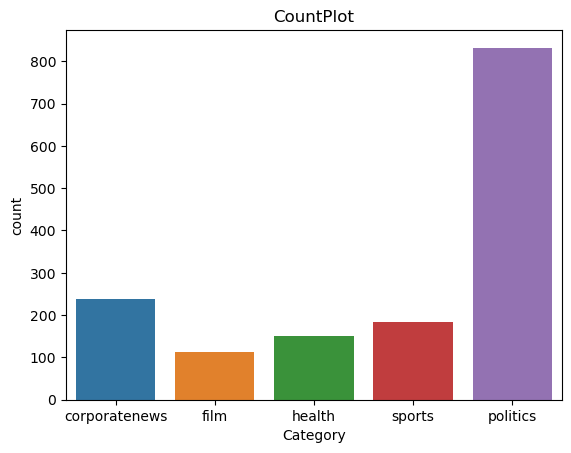

In [90]:
sns.countplot(preprocessedData_CNN.topic)
plt.xlabel('Category')
plt.title('CountPlot')


/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

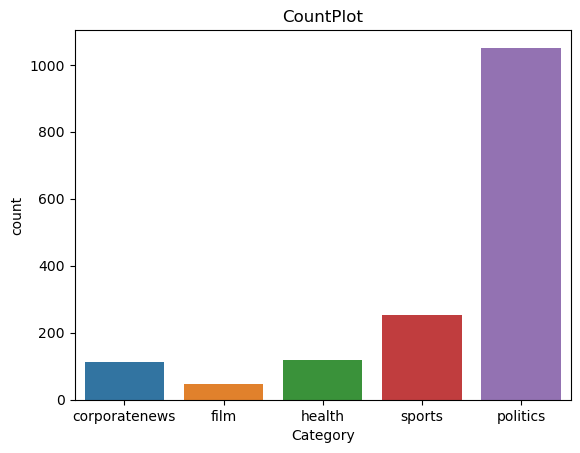

In [91]:
sns.countplot(preprocessedData_Fox.topic)
plt.xlabel('Category')
plt.title('CountPlot')


/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

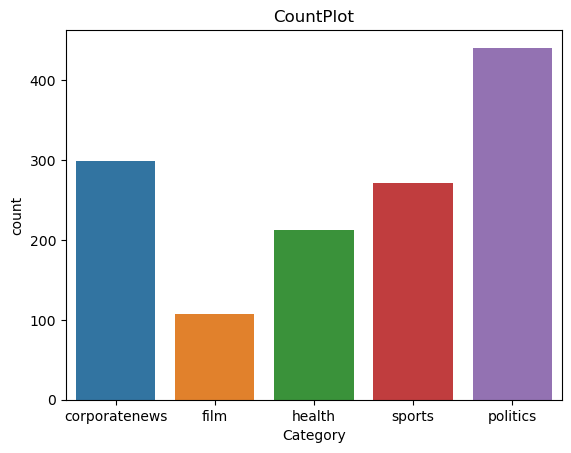

In [72]:
sns.countplot(preprocessedData_Reuters.topic)
plt.xlabel('Category')
plt.title('CountPlot')


# Additional DataPreProcessing for RNN

In [92]:
def padding(data_frame):
    MAX_WORDS = 1000
    MAX_SEQUENCE_LENGTH=1000
    encoded_docs=[one_hot(item['clean_text'],vocab_size) for i,item in data_frame.iterrows()]
    text=data_frame['clean_text'].to_list()
    labels=data_frame['topicEncoded'].to_list()

    tokenizer  = Tokenizer(num_words = MAX_WORDS)
    tokenizer.fit_on_texts(text)
    sequences =  tokenizer.texts_to_sequences(text)

    word_index = tokenizer.word_index
#     print("unique words : {}".format(len(word_index)))

    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

    labels = to_categorical(np.asarray(labels))
    return data, labels
#     print('Shape of data tensor:', data.shape)
#     print('Shape of label tensor:', labels.shape)
#     print(labels)

# Training on CNN 

In [93]:
Train_X_CNN, Train_Y_CNN = preprocessedData_CNN['clean_text'], preprocessedData_CNN['topicEncoded']
Test_X_FOX, Test_Y_FOX = preprocessedData_Fox['clean_text'], preprocessedData_Fox['topicEncoded']
Test_X_Reuters, Test_Y_Reuters = preprocessedData_Reuters['clean_text'], preprocessedData_Reuters['topicEncoded']
x_train_cnn, y_train_cnn = padding(preprocessedData_CNN)
x_test_fox, y_test_fox = padding(preprocessedData_Fox)
x_test_reuters, y_test_reuters = padding(preprocessedData_Reuters)

In [115]:
word_size = 1000
embed_size = 500
imdb_model=tf.keras.Sequential()
imdb_model.add(tf.keras.layers.Embedding(word_size, embed_size, input_shape=(x_train_cnn.shape[1],)))
imdb_model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
# Output Layer
imdb_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
imdb_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
"""#### Training the model"""

imdb_model.fit(x_train_cnn, y_train_cnn, epochs=25, batch_size=128)

Epoch 1/25
12/12 [==============================] - 33s 3s/step - loss: 0.5209 - accuracy: 0.5175
Epoch 2/25
12/12 [==============================] - 30s 2s/step - loss: 0.4158 - accuracy: 0.5485
Epoch 3/25
12/12 [==============================] - 31s 3s/step - loss: 0.4147 - accuracy: 0.5485
Epoch 4/25
12/12 [==============================] - 29s 2s/step - loss: 0.4119 - accuracy: 0.5485
Epoch 5/25
12/12 [==============================] - 29s 2s/step - loss: 0.4087 - accuracy: 0.5485
Epoch 6/25
12/12 [==============================] - 29s 2s/step - loss: 0.3958 - accuracy: 0.5504
Epoch 7/25
12/12 [==============================] - 30s 2s/step - loss: 0.3831 - accuracy: 0.5583
Epoch 8/25
12/12 [==============================] - 30s 2s/step - loss: 0.3552 - accuracy: 0.5781
Epoch 9/25
12/12 [==============================] - 31s 3s/step - loss: 0.3386 - accuracy: 0.6058
Epoch 10/25
12/12 [==============================] - 30s 2s/step - loss: 0.3058 - accuracy: 0.6513
Epoch 11/25
12/12 [

# Testing on FOX News

In [117]:
test_loss, test_acurracy = imdb_model.evaluate(x_test_fox, y_test_fox)

print("RNN Test accuracy score: {}".format(test_acurracy*100))

y_pred=imdb_model.predict(x_test_fox, batch_size=200, verbose=2)
report = classification_report(y_test_fox, y_pred.round())
print(report)
# print(classification_report(Test_Y_Reuters,test_acurracy))

50/50 [==============================] - 16s 315ms/step - loss: 0.3996 - accuracy: 0.5726
RNN Test accuracy score: 0.5726010203361511
8/8 - 10s - 10s/epoch - 1s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00       118
           3       0.77      0.67      0.72      1051
           4       0.22      0.01      0.02       253

   micro avg       0.74      0.45      0.56      1584
   macro avg       0.20      0.14      0.15      1584
weighted avg       0.54      0.45      0.48      1584
 samples avg       0.45      0.45      0.45      1584



/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing on Reuters News

In [118]:
test_loss, test_acurracy = imdb_model.evaluate(x_test_reuters, y_test_reuters)

print("RNN Test accuracy score: {}".format(test_acurracy*100))

y_pred=imdb_model.predict(x_test_reuters, batch_size=200, verbose=2)
report = classification_report(y_test_reuters, y_pred.round())
print(report)
# print(classification_report(Test_Y_Reuters,test_acurracy))

42/42 [==============================] - 18s 423ms/step - loss: 0.7659 - accuracy: 0.2635
RNN Test accuracy score: 0.2635135054588318
7/7 - 8s - 8s/epoch - 1s/step
              precision    recall  f1-score   support

           0       0.02      0.00      0.01       299
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00       213
           3       0.39      0.61      0.47       441
           4       0.00      0.00      0.00       272

   micro avg       0.36      0.20      0.26      1332
   macro avg       0.08      0.12      0.10      1332
weighted avg       0.13      0.20      0.16      1332
 samples avg       0.20      0.20      0.20      1332



/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training on FOX News

In [119]:
Train_X_FOX, Train_Y_FOX = preprocessedData_Fox['clean_text'], preprocessedData_Fox['topicEncoded']
Test_X_CNN, Test_Y_CNN = preprocessedData_CNN['clean_text'], preprocessedData_CNN['topicEncoded']
Test_X_Reuters, Test_Y_Reuters = preprocessedData_Reuters['clean_text'], preprocessedData_Reuters['topicEncoded']
x_train_fox, y_train_fox = padding(preprocessedData_Fox)
x_test_cnn, y_test_cnn = padding(preprocessedData_CNN)
x_test_reuters, y_test_reuters = padding(preprocessedData_Reuters)

In [120]:
word_size = 1000
embed_size = 500
imdb_model=tf.keras.Sequential()
imdb_model.add(tf.keras.layers.Embedding(word_size, embed_size, input_shape=(x_train_fox.shape[1],)))
imdb_model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
# Output Layer
imdb_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
imdb_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
"""#### Training the model"""

imdb_model.fit(x_train_fox, y_train_fox, epochs=25, batch_size=128)

Epoch 1/25
13/13 [==============================] - 40s 3s/step - loss: 0.4486 - accuracy: 0.6174
Epoch 2/25
13/13 [==============================] - 34s 3s/step - loss: 0.3489 - accuracy: 0.6635
Epoch 3/25
13/13 [==============================] - 33s 3s/step - loss: 0.3484 - accuracy: 0.6635
Epoch 4/25
13/13 [==============================] - 47s 4s/step - loss: 0.3465 - accuracy: 0.6635
Epoch 5/25
13/13 [==============================] - 49s 4s/step - loss: 0.3469 - accuracy: 0.6635
Epoch 6/25
13/13 [==============================] - 37s 3s/step - loss: 0.3447 - accuracy: 0.6635
Epoch 7/25
13/13 [==============================] - 39s 3s/step - loss: 0.3429 - accuracy: 0.6635
Epoch 8/25
13/13 [==============================] - 34s 3s/step - loss: 0.3379 - accuracy: 0.6635
Epoch 9/25
13/13 [==============================] - 33s 3s/step - loss: 0.3274 - accuracy: 0.6635
Epoch 10/25
13/13 [==============================] - 35s 3s/step - loss: 0.3153 - accuracy: 0.6679
Epoch 11/25
13/13 [

# Testing on CNN News

In [123]:
test_loss, test_acurracy = imdb_model.evaluate(x_test_cnn, y_test_cnn)

print("RNN Test accuracy score: {}".format(test_acurracy*100))

y_pred=imdb_model.predict(x_test_cnn, batch_size=200, verbose=2)
report = classification_report(y_test_cnn, y_pred.round())
print(report)
# print(classification_report(Test_Y_Reuters,test_acurracy))

48/48 [==============================] - 13s 278ms/step - loss: 0.6265 - accuracy: 0.4845
RNN Test accuracy score: 48.45089018344879
8/8 - 9s - 9s/epoch - 1s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       237
           1       0.00      0.00      0.00       113
           2       0.00      0.00      0.00       151
           3       0.58      0.78      0.66       832
           4       0.17      0.07      0.09       184

   micro avg       0.56      0.43      0.49      1517
   macro avg       0.15      0.17      0.15      1517
weighted avg       0.34      0.43      0.38      1517
 samples avg       0.43      0.43      0.43      1517



/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing on Reuters News

In [124]:
test_loss, test_acurracy = imdb_model.evaluate(x_test_reuters, y_test_reuters)

print("RNN Test accuracy score: {}".format(test_acurracy*100))

y_pred=imdb_model.predict(x_test_reuters, batch_size=200, verbose=2)
report = classification_report(y_test_reuters, y_pred.round())
print(report)
# print(classification_report(Test_Y_Reuters,test_acurracy))

42/42 [==============================] - 13s 308ms/step - loss: 0.8277 - accuracy: 0.3348
RNN Test accuracy score: 33.483484387397766
7/7 - 8s - 8s/epoch - 1s/step
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       299
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00       213
           3       0.38      0.78      0.51       441
           4       0.14      0.02      0.04       272

   micro avg       0.37      0.26      0.31      1332
   macro avg       0.20      0.16      0.11      1332
weighted avg       0.27      0.26      0.18      1332
 samples avg       0.26      0.26      0.26      1332



/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training on Reuters News

In [125]:
Train_X_Reuters, Train_Y_Reuters = preprocessedData_Reuters['clean_text'], preprocessedData_Reuters['topicEncoded']
Test_X_CNN, Test_Y_CNN = preprocessedData_CNN['clean_text'], preprocessedData_CNN['topicEncoded']
Test_X_FOX, Test_Y_FOX = preprocessedData_Fox['clean_text'], preprocessedData_Fox['topicEncoded']
x_train_reuters, y_train_reuters = padding(preprocessedData_Reuters)
x_test_cnn, y_test_cnn = padding(preprocessedData_CNN)
x_test_fox, y_test_fox = padding(preprocessedData_Fox)

In [126]:
word_size = 1000
embed_size = 500
imdb_model=tf.keras.Sequential()
imdb_model.add(tf.keras.layers.Embedding(word_size, embed_size, input_shape=(x_train_reuters.shape[1],)))
imdb_model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
# Output Layer
imdb_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
imdb_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [127]:
"""#### Training the model"""

imdb_model.fit(x_train_reuters, y_train_reuters, epochs=25, batch_size=128)

Epoch 1/25
11/11 [==============================] - 37s 3s/step - loss: 0.5554 - accuracy: 0.2958
Epoch 2/25
11/11 [==============================] - 31s 3s/step - loss: 0.4798 - accuracy: 0.3101
Epoch 3/25
11/11 [==============================] - 30s 3s/step - loss: 0.4771 - accuracy: 0.3311
Epoch 4/25
11/11 [==============================] - 27s 2s/step - loss: 0.4737 - accuracy: 0.3326
Epoch 5/25
11/11 [==============================] - 27s 2s/step - loss: 0.4680 - accuracy: 0.3679
Epoch 6/25
11/11 [==============================] - 27s 2s/step - loss: 0.4602 - accuracy: 0.4144
Epoch 7/25
11/11 [==============================] - 26s 2s/step - loss: 0.4498 - accuracy: 0.4467
Epoch 8/25
11/11 [==============================] - 26s 2s/step - loss: 0.4284 - accuracy: 0.4820
Epoch 9/25
11/11 [==============================] - 26s 2s/step - loss: 0.4032 - accuracy: 0.5210
Epoch 10/25
11/11 [==============================] - 26s 2s/step - loss: 0.3647 - accuracy: 0.5863
Epoch 11/25
11/11 [

# Testing on CNN News

In [128]:
test_loss, test_acurracy = imdb_model.evaluate(x_test_cnn, y_test_cnn)

print("RNN Test accuracy score: {}".format(test_acurracy*100))

y_pred=imdb_model.predict(x_test_cnn, batch_size=200, verbose=2)
report = classification_report(y_test_cnn, y_pred.round())
print(report)
# print(classification_report(Test_Y_Reuters,test_acurracy))

48/48 [==============================] - 17s 356ms/step - loss: 0.7643 - accuracy: 0.3415
RNN Test accuracy score: 34.14634168148041
8/8 - 9s - 9s/epoch - 1s/step
              precision    recall  f1-score   support

           0       0.11      0.07      0.08       237
           1       0.00      0.00      0.00       113
           2       0.12      0.09      0.10       151
           3       0.67      0.43      0.52       832
           4       0.00      0.00      0.00       184

   micro avg       0.42      0.25      0.32      1517
   macro avg       0.18      0.12      0.14      1517
weighted avg       0.40      0.25      0.31      1517
 samples avg       0.25      0.25      0.25      1517



/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing on FOX News

In [129]:
test_loss, test_acurracy = imdb_model.evaluate(x_test_fox, y_test_fox)

print("RNN Test accuracy score: {}".format(test_acurracy*100))

y_pred=imdb_model.predict(x_test_fox, batch_size=200, verbose=2)
report = classification_report(y_test_fox, y_pred.round())
print(report)
# print(classification_report(Test_Y_Reuters,test_acurracy))

50/50 [==============================] - 14s 274ms/step - loss: 0.6823 - accuracy: 0.3813
RNN Test accuracy score: 38.131314516067505
8/8 - 9s - 9s/epoch - 1s/step
              precision    recall  f1-score   support

           0       0.07      0.10      0.08       114
           1       0.00      0.00      0.00        48
           2       0.07      0.05      0.06       118
           3       0.73      0.42      0.53      1051
           4       0.04      0.01      0.02       253

   micro avg       0.49      0.29      0.37      1584
   macro avg       0.18      0.12      0.14      1584
weighted avg       0.50      0.29      0.37      1584
 samples avg       0.29      0.29      0.29      1584



/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training and Testing on Reuters News

In [130]:
test_loss, test_acurracy = imdb_model.evaluate(x_train_reuters, y_train_reuters)

print("RNN Test accuracy score: {}".format(test_acurracy*100))

y_pred=imdb_model.predict(x_train_reuters, batch_size=200, verbose=2)
report = classification_report(y_train_reuters, y_pred.round())
print(report)
# print(classification_report(Test_Y_Reuters,test_acurracy))

42/42 [==============================] - 13s 305ms/step - loss: 0.0878 - accuracy: 0.9482
RNN Test accuracy score: 94.81981992721558
7/7 - 8s - 8s/epoch - 1s/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       299
           1       1.00      0.52      0.69       107
           2       0.94      0.87      0.90       213
           3       0.96      1.00      0.98       441
           4       0.96      0.87      0.91       272

   micro avg       0.97      0.90      0.93      1332
   macro avg       0.97      0.84      0.89      1332
weighted avg       0.97      0.90      0.93      1332
 samples avg       0.90      0.90      0.90      1332



/Users/ayushi_nirmal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
